# Data Science Course Final Project: Predicting Health Insurance Cost

## 1. Problem Statement 

For my final project, I would like to build a model to predict health insurance cost based on personal infomation at United States. As of 2008, Kaiser family foundation reported that the percentage of Americans receiving employer sponsored health insurance had declined for the eighth consecutive year. This is mainly due to the rising cost of health insurance and accompanying rise in the cost of health care expenses has led health insurers to provide more policies with higher deductibles and other limitations that require the consumer to pay a greater share of the cost themselves. What should be a reasonable insurance price? Why do consumers get so different quotes from different health insurance providers? In this project, I would like to build a machine learning model to help consumers predict a reasonable medical insurance price before makign purchases.

## 2. Approach Overview

### 2.1 Data Source

https://www.kaggle.com/mirichoi0218/insurance

### 2.2 Target variable and feature variables

Target variable: Medical Insurance Charges

Feature variable: age, sex, bmi, smoker, region

### 2.3 Model Approach

Linear regression --> Decision Tree --> Random Forest --> GridSearchCV

## 3. Data Preparation

### 3.1 Import data and data cleaning

In [2]:
# import all neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# import dataset
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# check columns (what they are and what data types)
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
# shape of the data, number of rows
insurance.shape

(1338, 7)

In [19]:
# replace non-numerical columns
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(insurance.sex.drop_duplicates()) 
insurance.sex = le.transform(insurance.sex)
# smoker or not
le.fit(insurance.smoker.drop_duplicates()) 
insurance.smoker = le.transform(insurance.smoker)
#region
le.fit(insurance.region.drop_duplicates()) 
insurance.region = le.transform(insurance.region)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### 3.2 Data correlation analysis

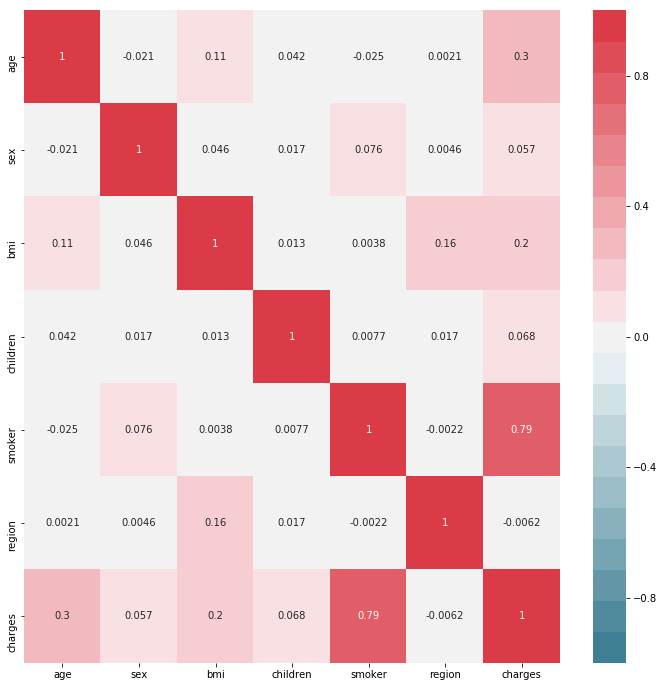

In [8]:
# visualize correlations using seaborn on a heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(
    insurance.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
);

## 4. Model Building

### 4.1 Linear regression Model 

In [9]:
# select target variable and properties deciding the target variable 
feature_col = ['age','sex','bmi','children','smoker']
target_col = ['charges']
X = insurance.loc[:,feature_col]
y = insurance.loc[:,target_col]

In [10]:
# split both X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y)
# check train and test sets
print('X_train dimension:',X_train.shape)
print('X_test dimension:',X_test.shape)
print('y_train dimension:',y_train.shape)
print('y_test dimension:',y_test.shape)

X_train dimension: (1003, 5)
X_test dimension: (335, 5)
y_train dimension: (1003, 1)
y_test dimension: (335, 1)


In [11]:
# use linear regression to fit and score the data
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

0.7173598553423278
0.7607265318403235


In [12]:
# how is the "score" comparing to root mean square?
from sklearn import metrics
metrics.mean_squared_error(y_test,lr.predict(X_test))

45388827.03478107

### 4.2 Decision Tree

In [13]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
print(dtr.score(X_train,y_train))
print(dtr.score(X_test,y_test))
dtr_train_score=dtr.score(X_train,y_train)
dtr_test_score=dtr.score(X_test,y_test)

0.9994493478827203
0.6610003936690897


In [14]:
pd.DataFrame({'feature': feature_col, 'importance': dtr.feature_importances_})

,feature,importance
0,age,0.135374
1,sex,0.007878
2,bmi,0.210735
3,children,0.019353
4,smoker,0.626660


### 4.3 Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))
rfr_train_score=rfr.score(X_train,y_train)
rfr_test_score=rfr.score(X_test,y_test)

C:\Users\huangxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9780743389121511
0.8090891273551304


In [16]:
pd.DataFrame({'feature': feature_col, 'importance': rfr.feature_importances_})

,feature,importance
0,age,0.139627
1,sex,0.006500
2,bmi,0.207249
3,children,0.020119
4,smoker,0.626505


### 4.4 Apply GridSearchCV with Random Forest model

In [17]:
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(5,shuffle=True)
grid = GridSearchCV(
    estimator = rfr,
    param_grid={},
    cv=kf,
    return_train_score = True,
)

grid.fit(X,y)
print(grid.cv_results_['mean_train_score'])
print(grid.cv_results_['mean_test_score'])
grid_train_score=grid.cv_results_['mean_train_score']
grid_test_score=grid.cv_results_['mean_test_score']

C:\Users\huangxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\huangxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\huangxi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\huangxi\AppData\Local\Continuum\anaconda3\l

[0.97580886]
[0.83354954]


In [18]:
#Create a results summary table
model_type = ['LinearRegression','DecisionTree', 'RandomForest','GridSearchCV']
training_results = [lr_train_score,dtr_train_score,rfr_train_score,grid_train_score]
test_results = [lr_test_score,dtr_test_score,rfr_test_score,grid_test_score]

results_df = pd.DataFrame({'model_type':model_type, 'training_results':training_results, 'test_results':test_results})
results_df

,model_type,training_results,test_results
0,LinearRegression,0.760727,0.71736
1,DecisionTree,0.999449,0.661
2,RandomForest,0.978074,0.809089
3,GridSearchCV,[0.9758088634270907],[0.8335495370161758]
